In [1]:
# import libraries
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load IMDB dataset
df = pd.read_csv(r"C:\Users\yashk\Projects\Competitions\Fellowship AI\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
def clean_text(text):

    # Remove HTML tags, special characters, and convert to lowercase
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)  
    text = text.lower()  
    text = text.split()
    
    # Remove stopwords
    text = [word for word in text if word not in stop_words] 
    return ' '.join(text)  

In [5]:
# Apply cleaning to the dataset
df['cleaned_review'] = df['review'].apply(clean_text)

In [ ]:
# Split data into features (X) and labels (y)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42) # 20% testing 80% training

In [7]:
# Tokenize and pad text
vocab_size = 10000
max_len = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [8]:
#Build the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define model
embedding_dim = 64
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\yashk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=5,
    batch_size=32
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - accuracy: 0.7291 - loss: 0.5180 - val_accuracy: 0.8512 - val_loss: 0.3455
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.8757 - loss: 0.3086 - val_accuracy: 0.8655 - val_loss: 0.3229
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9082 - loss: 0.2336 - val_accuracy: 0.8716 - val_loss: 0.3235
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9294 - loss: 0.1921 - val_accuracy: 0.8648 - val_loss: 0.3483
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 70ms/step - accuracy: 0.9437 - loss: 0.1569 - val_accuracy: 0.8641 - val_loss: 0.3922


In [10]:
model.evaluate(X_test_padded, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8644 - loss: 0.3831


[0.3921857178211212, 0.8640999794006348]

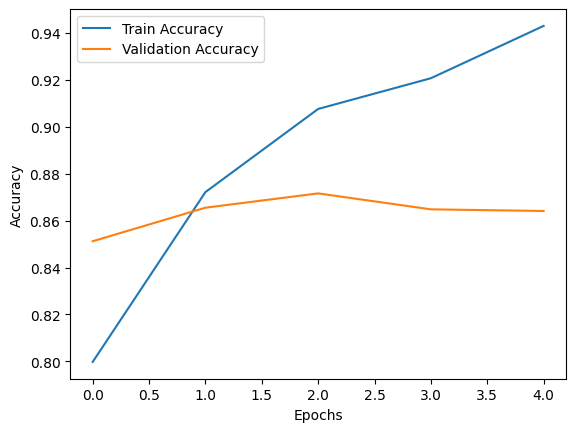

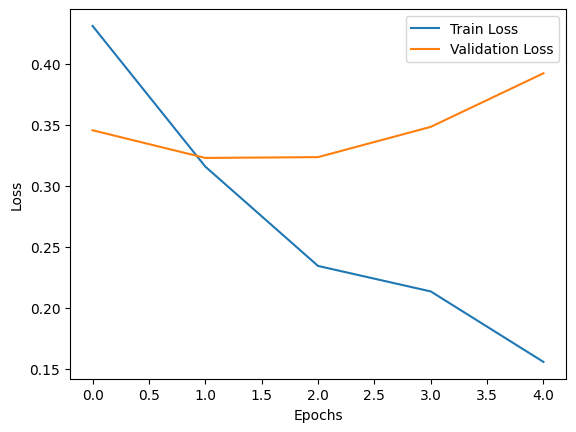

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


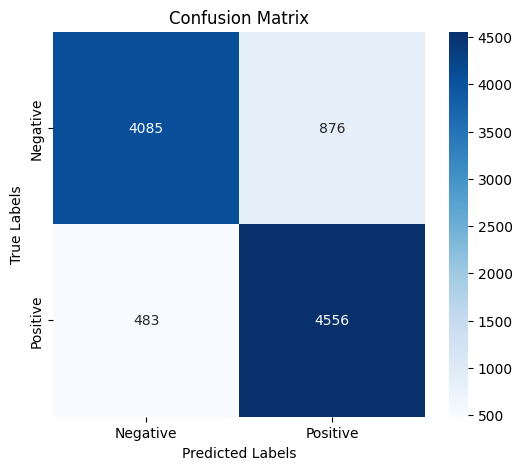

              precision    recall  f1-score   support

    Negative       0.89      0.82      0.86      4961
    Positive       0.84      0.90      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [ ]:
# confusion matrix and heat map
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred_prob = model.predict(X_test_padded)  
y_pred = (y_pred_prob > 0.5).astype(int) 

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

In [ ]:
# Prediction function
def predict_sentiment(review):
    cleaned_review = clean_text(review)  # Clean the input review
    sequence = tokenizer.texts_to_sequences([cleaned_review])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post')
    prediction = model.predict(padded)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

# Test predictions
print(predict_sentiment('''"ADIPURUSH" is an unfortunate attempt at adapting an epic story, resulting in a cinematic disaster that falls flat on multiple levels. From the onset, it becomes painfully evident that the film has made some regrettable choices in terms of visual effects (VFX), dialogues, and the overall adaptation.
'''))
print(predict_sentiment('''Venom 3 - The Last Dance is still messy, but it gets more right than its predecessors. This is easily the campiest and most mature of the bunch. It takes its time with the characters, letting us sit with them instead of rushing into the next action set piece. Still being PG-13 it manages to cram in a lot more gore than its predecessors.'''))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Positive
